Data Import and Basic Overview

In [ ]:
import pandas as pd
# Load dataset
df = pd.read_csv('CloudWatch_Traffic_Web_Attack.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   bytes_in             282 non-null    int64 
 1   bytes_out            282 non-null    int64 
 2   creation_time        282 non-null    object
 3   end_time             282 non-null    object
 4   src_ip               282 non-null    object
 5   src_ip_country_code  282 non-null    object
 6   protocol             282 non-null    object
 7   response.code        282 non-null    int64 
 8   dst_port             282 non-null    int64 
 9   dst_ip               282 non-null    object
 10  rule_names           282 non-null    object
 11  observation_name     282 non-null    object
 12  source.meta          282 non-null    object
 13  source.name          282 non-null    object
 14  time                 282 non-null    object
 15  detection_types      282 non-null    object
dtypes: int64

,bytes_in,bytes_out,creation_time,end_time,src_ip,src_ip_country_code,protocol,response.code,dst_port,dst_ip,rule_names,observation_name,source.meta,source.name,time,detection_types
0,5602,12990,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,147.161.161.82,AE,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
1,30912,18186,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.33.6,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
2,28506,13468,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.212.255,CA,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
3,30546,14278,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,136.226.64.114,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
4,6526,13892,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.240.79,NL,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule


In [2]:
 #Check for missing values
missing_values = df.isnull().sum()
# Fill or drop missing values as needed
df['bytes_in'].fillna(df['bytes_in'].median(), inplace=True)
df.dropna(subset=['src_ip', 'dst_ip'], inplace=True)
df['creation_time'] = pd.to_datetime(df['creation_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

C:\Users\shing\AppData\Local\Temp\ipykernel_16068\4139101129.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bytes_in'].fillna(df['bytes_in'].median(), inplace=True)


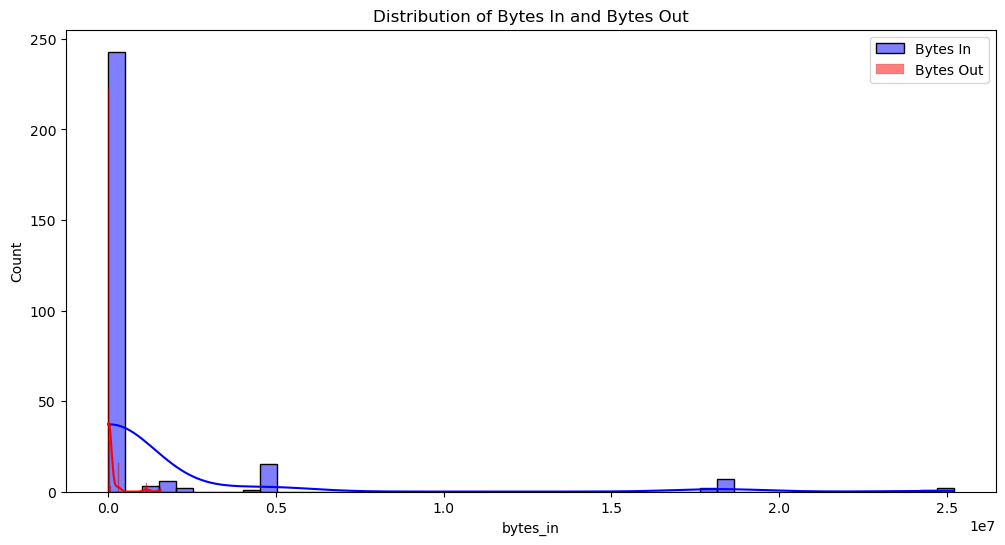

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
# Distribution of bytes in and bytes out
plt.figure(figsize=(12, 6))
sns.histplot(df['bytes_in'], bins=50, color='blue', kde=True,
label='Bytes In')
sns.histplot(df['bytes_out'], bins=50, color='red', kde=True,
label='Bytes Out')
plt.legend()
plt.title('Distribution of Bytes In and Bytes Out')
plt.show()

C:\Users\shing\AppData\Local\Temp\ipykernel_16068\1300580894.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='protocol', data=df, palette='viridis')


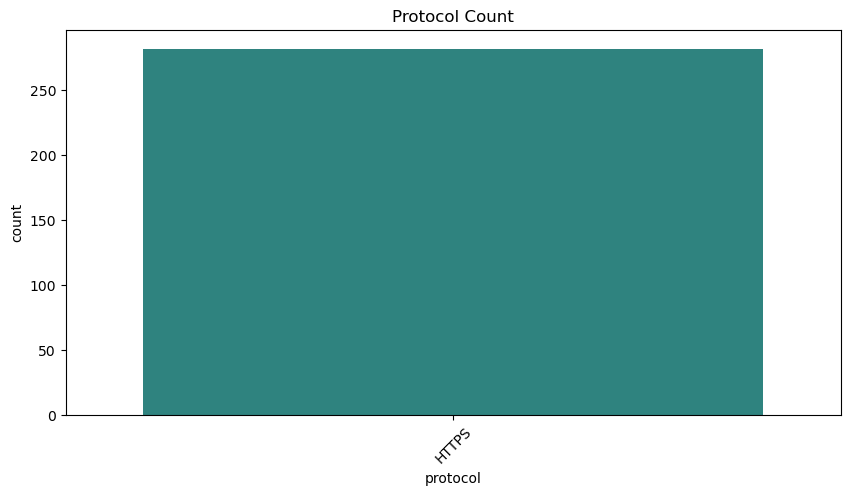

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x='protocol', data=df, palette='viridis')
plt.title('Protocol Count')
plt.xticks(rotation=45)
plt.show()+


In [8]:
df['session_duration'] = (df['end_time'] -
df['creation_time']).dt.total_seconds()
# Average packet size
df['avg_packet_size'] = (df['bytes_in'] + df['bytes_out']) 
df['session_duration']

0      600.0
1      600.0
2      600.0
3      600.0
4      600.0
       ...  
277    600.0
278    600.0
279    600.0
280    600.0
281    600.0
Name: session_duration, Length: 282, dtype: float64

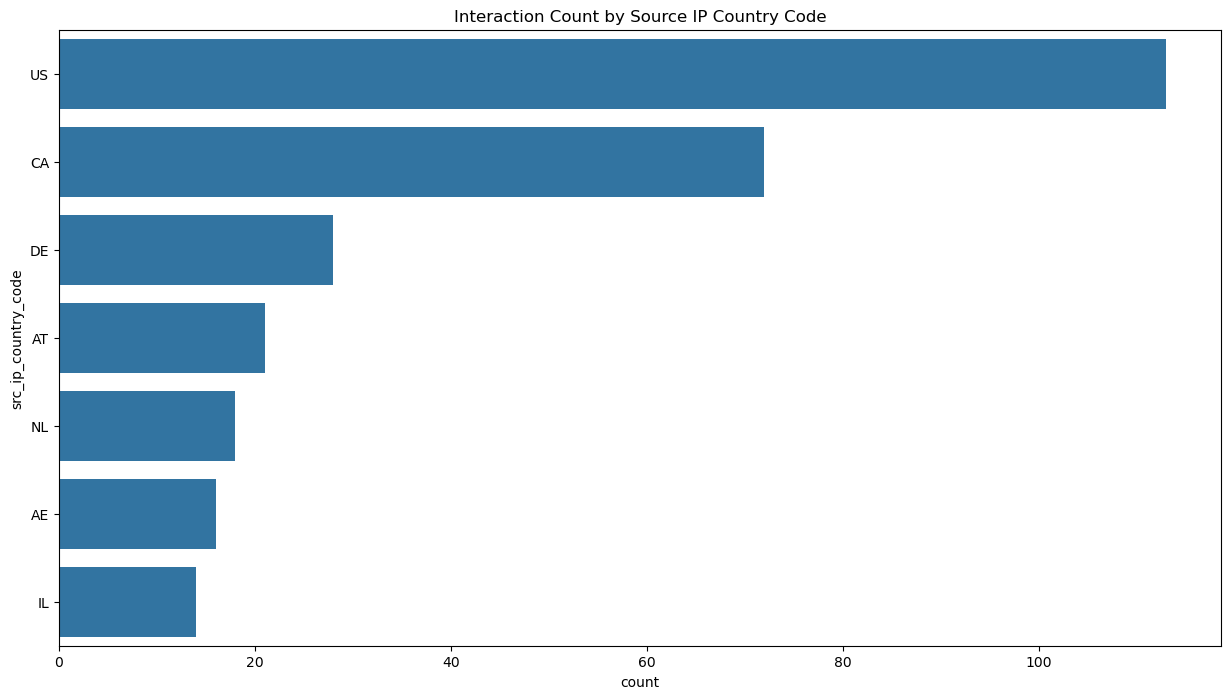

In [9]:
plt.figure(figsize=(15, 8))
sns.countplot(y='src_ip_country_code', data=df,
order=df['src_ip_country_code'].value_counts().index)
plt.title('Interaction Count by Source IP Country Code')
plt.show()

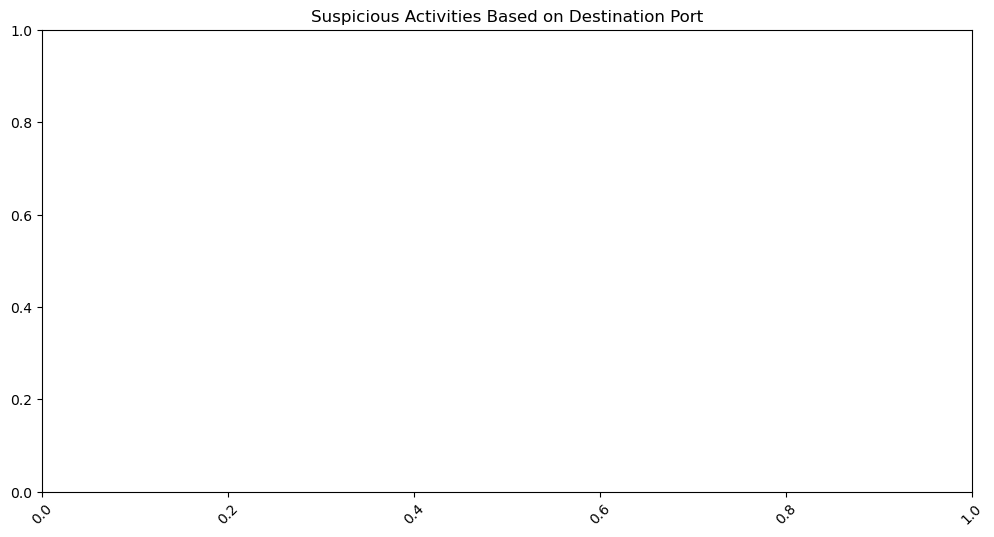

In [10]:
plt.figure(figsize=(12, 6))
sns.countplot(x='dst_port', data=df[df['detection_types'] ==
'Suspicious'], palette='coolwarm')
plt.title('Suspicious Activities Based on Destination Port')
plt.xticks(rotation=45)
plt.show()

In [19]:
import pandas as pd
from sklearn.ensemble import IsolationForest

# Sample data creation if you don't have the CSV
data = {
    'bytes_in': [15602, 13091, 22825, 13892],
    'bytes_out': [12990, 18012, 28506, 18921],
    'creation_time': ['2024-01-01 12:00', '2024-01-01 12:05', 
                     '2024-01-01 12:10', '2024-01-01 12:15'],
    'end_time': ['2024-01-01 12:10', '2024-01-01 12:15',
                '2024-01-01 12:20', '2024-01-01 12:25']
}
df = pd.DataFrame(data)

# Preprocessing
df['creation_time'] = pd.to_datetime(df['creation_time'])
df['end_time'] = pd.to_datetime(df['end_time'])
df['session_duration'] = (df['end_time'] - df['creation_time']).dt.total_seconds()
df['avg_packet_size'] = (df['bytes_in'] + df['bytes_out']) / df['session_duration']

# Anomaly Detection
features = df[['bytes_in', 'bytes_out', 'session_duration', 'avg_packet_size']]
model = IsolationForest(contamination=0.05, random_state=42)
df['anomaly'] = model.fit_predict(features)
df['anomaly'] = df['anomaly'].apply(lambda x: 'Suspicious' if x == -1 else 'Normal')

print(df[['bytes_in', 'bytes_out', 'anomaly']])


   bytes_in  bytes_out     anomaly
0     15602      12990      Normal
1     13091      18012      Normal
2     22825      28506  Suspicious
3     13892      18921      Normal


In [20]:
print(df['anomaly'].value_counts())
# Display anomaly samples
suspicious_activities = df[df['anomaly'] == 'Suspicious']
print(suspicious_activities.head())


anomaly
Normal        3
Suspicious    1
Name: count, dtype: int64
   bytes_in  bytes_out       creation_time            end_time  \
2     22825      28506 2024-01-01 12:10:00 2024-01-01 12:20:00   

   session_duration  avg_packet_size     anomaly  
2             600.0        85.551667  Suspicious  


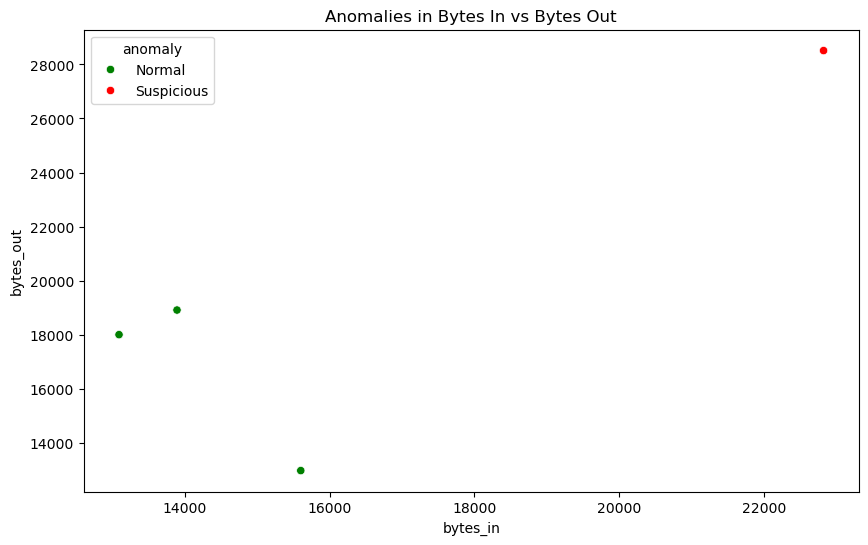

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bytes_in', y='bytes_out', hue='anomaly',
data=df, palette=['green', 'red'])
plt.title('Anomalies in Bytes In vs Bytes Out')
plt.show()